# Testando vários modelos de ajuste de curvas oscilatórias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Declaração das funções de ajuste

In [2]:
def oldroydB_elast(w, Gn0, tau_r):
    return Gn0 * w ** 2 * tau_r ** 2 / (1 + w ** 2 * tau_r ** 2)  

def oldroydB_visc(w, Gn0, tau_r, eta_inf):
    return Gn0 * w * tau_r / (1 + w ** 2 * tau_r ** 2) + eta_inf * w    # correto! Tese Calabrese

###############################

def jeffreys_elast(w, eta0, lambda1, lambda2):
    return eta0 * (lambda1 - lambda2) * w ** 2 / (1 + lambda1 ** 2 * w ** 2)
    
    
def jeffreys_visc(w, eta0, lambda1, lambda2):
    return eta0 * (1 + lambda1 * lambda2 * w ** 2) * w / (1 + lambda1 ** 2 * w ** 2)

###############################

def jeffreys_elast2(w, G0, lambda0, lambdaj):
    return ((G0 * lambda0 * (lambda0 - lambdaj) * w ** 2 
           / (1 + lambda0 ** 2 * w ** 2)))
    
    
def jeffreys_visc2(w, G0, lambda0, lambdaj):
    return (G0 * lambda0 * (1 + lambda0 * lambdaj * w ** 2) 
                        * w / (1 + lambda0 ** 2 * w ** 2))
    
###############################

def two_mode_elast(w, G01, G02, lambda1, lambda2):
    return (( G01 * (lambda1 * w) ** 2 / (1 + (lambda1 * w) ** 2) ) 
         + ( G02 * (lambda2 * w) ** 2 / (1 + (lambda2 * w) ** 2) ))
    
def two_mode_visc(w, G01, G02, lambda1, lambda2):
    return (( G01 * (lambda1 * w) / (1 + (lambda1 * w) ** 2) ) 
         + ( G02 * (lambda2 * w) / (1 + (lambda2 * w) ** 2) ))
    
###############################
def maxwell_elast(w, G0, lambda1):
    return G0 * (lambda1 * w) ** 2 / (1 + (lambda1 * w) ** 2)
    
def maxwell_visc(w, G0, lambda1):
    return G0 * (lambda1 * w)      / (1 + (lambda1 * w) ** 2)

## Inicialização dos parâmetros para visualização

In [3]:
w = np.logspace(-2, 1) # Frequência, omega

# Módulos platô

G0_o   = 10 # Oldroyd
G0_j   = 10 # Jeffreys
G01_tm = 10 # Two Mode
G02_tm = 15 # Two Mode
G0     = 10 # Maxwell

# Tempos de relaxação

tr_o    = 10 # Oldroyd
tr1_j   = 50 # Jeffreys  tr1_j > tr2_j, sempre!
tr2_j   = 1  # Jeffreys
tr1_t   = 1  # Two Mode
tr2_t   = 5  # Two Mode
tr      = 10 # Maxwell

# Outros

eta_inf = 2 # Oldroyd


## Criação dos valores de y dos modelos

In [4]:
# y1_oldroyd = oldroydB_elast(w, G0_o, tr_o)
# y2_oldroyd = oldroydB_visc(w, G0_o, tr_o, eta_inf)
# y1_maxwell = maxwell_elast(w, G0, tr)
# y2_maxwell = maxwell_visc(w, G0, tr)
# y1_jeffreys = jeffreys_elast2(w, G0_j, tr1_j, tr2_j)
# y2_jeffreys = jeffreys_visc2(w, G0_j, tr1_j, tr2_j)
# y1_twomode = two_mode_elast(w, G01_tm, G02_tm, tr1_t, tr2_t)
# y2_twomode = two_mode_visc(w, G01_tm, G02_tm, tr1_t, tr2_t)

In [5]:
y1_oldroyd = oldroydB_elast(w, G0_o, tr_o)
y2_oldroyd = oldroydB_visc(w, G0_o, tr_o, eta_inf)
y1_maxwell = maxwell_elast(w, G0, tr)
y2_maxwell = maxwell_visc(w, G0, tr)
y1_jeffreys = jeffreys_elast2(w, G0_j, tr1_j, tr2_j)
y2_jeffreys = jeffreys_visc2(w, G0_j, tr1_j, tr2_j)
y1_twomode = two_mode_elast(w, G01_tm, G02_tm, tr1_t, tr2_t)
y2_twomode = two_mode_visc(w, G01_tm, G02_tm, tr1_t, tr2_t)

## Definição das funções para plotar as curvas

In [6]:
# y1_oldroyd = oldroydB_elast(w, G0_o, tr_o)
# y2_oldroyd = oldroydB_visc(w, G0_o, tr_o, eta_inf)
def plot_oldroyd(ax):
    ax.scatter(w, y1_oldroyd)
    ax.scatter(w, y2_oldroyd)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('$\omega/rad.s^{-1}$')
    ax.set_ylabel("G', G''/Pa")
    ax.set_xlim(min(w), max(w))
    ax.set_ylim(min(min(y1_oldroyd), min(y2_oldroyd) / 2),
                max(max(y2_oldroyd), max(y1_oldroyd)) * 10)
    #fig.legend(["G'", "G''"])
    ax.set_title('Oldroyd-B')
    return ax

def plot_maxwell(ax):
    ax.scatter(w, y1_maxwell)
    ax.scatter(w, y2_maxwell)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('$\omega/rad.s^{-1}$')
    ax.set_ylabel("G', G''/Pa")
    ax.set_xlim(min(w), max(w))
    ax.set_ylim(min(min(y1_maxwell), min(y2_maxwell) / 2),
                max(max(y2_maxwell), max(y1_maxwell)) * 10)
    #ax.legend(["G'", "G''"])
    ax.set_title('Maxwell')
    
def plot_jeffreys(ax):
    ax.scatter(w, y1_jeffreys)
    ax.scatter(w, y2_jeffreys)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('$\omega/rad.s^{-1}$')
    ax.set_ylabel("G', G''/Pa")
    ax.set_xlim(min(w), max(w))
    ax.set_ylim(min(min(y1_jeffreys), min(y2_jeffreys) / 2),
                max(max(y2_jeffreys), max(y1_jeffreys)) * 10)
    #ax.legend(["G'", "G''"])
    ax.set_title('Jeffreys')
    
def plot_twomode(ax):
    ax.scatter(w, y1_twomode)
    ax.scatter(w, y2_twomode)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('$\omega/rad.s^{-1}$')
    ax.set_ylabel("G', G''/Pa")
    ax.set_xlim(min(w), max(w))
    ax.set_ylim(min(min(y1_twomode), min(y2_twomode) / 2),
                max(max(y2_twomode), max(y1_twomode)) * 10)
    #ax.legend(["G'", "G''"])
    ax.set_title('Two Mode')

## Plotando as curvas

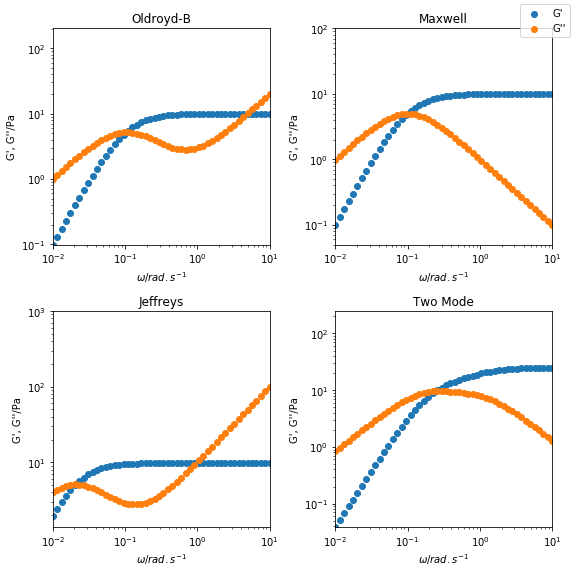

In [7]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

ax1 = plot_oldroyd(ax1)
ax2 = plot_maxwell(ax2)
ax3 = plot_jeffreys(ax3)
ax4 = plot_twomode(ax4)
fig.legend(["G'", "G''"])
fig.tight_layout()

## Testes de métodos de ajuste
### Utilizando 2 parâmetros no total -- Não é exatamente o que eu desejava.

In [8]:
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit, Model
import random

def desvio():  # Retorna um valor de (+-) 0 a 20, para %, de erro, para cada ponto
    return random.randrange(0, stop=20, step=1) / 100 * random.choice([-1, 1])

params = Parameters()
params.add('G0_1',          10., vary=True)
params.add('G0_2',          10., vary=True, expr='G0_1')
params.add('tr_1',          1. , vary=True)
params.add('tr_2',          1. , vary=True, expr='tr_1')

# expr limita os valores de um dos parâmetros para seguirem uma expressão.
# Nesse caso, a expressão é o valor da outra variável

aj_G0_1 = 10
aj_G0_2 = 10

aj_tr_1 = 10
aj_tr_2 = 10

dataset_x = np.logspace(-2, 1)

dataset_elast = maxwell_elast(dataset_x, aj_G0_1, aj_tr_1)
dataset_elast = np.array([i * (1 + desvio()) for i in dataset_elast])
dataset_visc  = maxwell_visc(dataset_x,  aj_G0_2, aj_tr_2)
dataset_visc  = np.array([i * (1 + desvio()) for i in dataset_visc])

datasets = [dataset_elast, dataset_visc]

def residual(params, x, datasets):
    model_elast = maxwell_elast(x, params['G0_1'], params['tr_1'])
    model_visc  = maxwell_visc (x, params['G0_2'], params['tr_2'])
    
    resid1 = datasets[0] - model_elast
    resid2 = datasets[1] - model_visc
    return np.concatenate((resid1, resid2))

fit = minimize( residual, params, args=(dataset_x, datasets) )
report_fit(fit)

[[Fit Statistics]]
    # function evals   = 24
    # data points      = 100
    # variables        = 2
    chi-square         = 31.718
    reduced chi-square = 0.324
    Akaike info crit   = -110.830
    Bayesian info crit = -105.619
[[Variables]]
    G0_1:   10.3116478 +/- 0.104618 (1.01%) (init= 10)
    G0_2:   10.3116478 +/- 0.104618 (1.01%)  == 'G0_1'
    tr_1:   9.92992497 +/- 0.309028 (3.11%) (init= 1)
    tr_2:   9.92992497 +/- 0.309028 (3.11%)  == 'tr_1'
[[Correlations]] (unreported correlations are <  0.100)
    C(G0_1, tr_1)                = -0.326 


[[Fit Statistics]]
    # function evals   = 24
    # data points      = 100
    # variables        = 2
    chi-square         = 34.177
    reduced chi-square = 0.349
    Akaike info crit   = -103.361
    Bayesian info crit = -98.151
[[Variables]]
    G0:   10.3497234 +/- 0.108550 (1.05%) (init= 10)
    tr:   9.96689409 +/- 0.320791 (3.22%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(G0, tr)                    = -0.326 


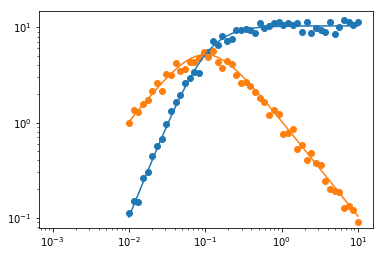

In [9]:
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit, Model
import random

def desvio():
    return random.randrange(0, stop=20, step=1) / 100 * random.choice([-1, 1])

# Simplificando os parâmetros, removendo os parâmetros possivelmente supérfluos
params = Parameters()
params.add('G0',          10., vary=True)
params.add('tr',          1. , vary=True)

aj_G0 = 10

aj_tr = 10

dataset_x = np.logspace(-2, 1)

dataset_elast = maxwell_elast(dataset_x, aj_G0_1, aj_tr_1)
dataset_elast = np.array([i * (1 + desvio()) for i in dataset_elast])
dataset_visc  = maxwell_visc(dataset_x,  aj_G0_2, aj_tr_2)
dataset_visc  = np.array([i * (1 + desvio()) for i in dataset_visc])

datasets = [dataset_elast, dataset_visc]

def residual(params, x, datasets):
    model_elast = maxwell_elast(x, params['G0'], params['tr'])
    model_visc  = maxwell_visc (x, params['G0'], params['tr'])
    
    resid1 = datasets[0] - model_elast
    resid2 = datasets[1] - model_visc
    return np.concatenate((resid1, resid2))

fit = minimize( residual, params, args=(dataset_x, datasets) )
report_fit(fit)

G0_fit = fit.params['G0']
tr_fit = fit.params['tr']

plt.scatter(dataset_x, dataset_elast, label="G' dado")
plt.scatter(dataset_x, dataset_visc, label="G'' dado")
plt.plot(dataset_x, maxwell_elast(dataset_x, G0_fit, tr_fit), label="G' modelo")
plt.plot(dataset_x, maxwell_visc(dataset_x, G0_fit, tr_fit), label="G'' modelo")
plt.xscale('log')
plt.yscale('log')

### Testando se os dois métodos são equivalentes ou não

In [10]:
def desvio():
    return random.randrange(0, stop=20, step=1) / 100 * random.choice([-1, 1])

params_2 = Parameters()
params_2.add('G0_1',          10., vary=True)
params_2.add('G0_2',          10., vary=True, expr='G0_1')
params_2.add('tr_1',          1. , vary=True)
params_2.add('tr_2',          1. , vary=True, expr='tr_1')

params_1 = Parameters()
params_1.add('G0',          10., vary=True)
params_1.add('tr',          1. , vary=True)

aj_G0_1 = 10
aj_G0_2 = 10

aj_tr_1 = 10
aj_tr_2 = 10

dataset_x = np.logspace(-2, 1)

dataset_elast = maxwell_elast(dataset_x, aj_G0_1, aj_tr_1)
dataset_elast = np.array([i * (1 + desvio()) for i in dataset_elast])
dataset_visc  = maxwell_visc(dataset_x,  aj_G0_2, aj_tr_2)
dataset_visc  = np.array([i * (1 + desvio()) for i in dataset_visc])

datasets = [dataset_elast, dataset_visc]

def residual_2(params_2, x, datasets):
    model_elast = maxwell_elast(x, params_2['G0_1'], params_2['tr_1'])
    model_visc  = maxwell_visc (x, params_2['G0_2'], params_2['tr_2'])
    
    resid1 = datasets[0] - model_elast
    resid2 = datasets[1] - model_visc
    return np.concatenate((resid1, resid2))

def residual_1(params_1, x, datasets):
    model_elast = maxwell_elast(x, params_1['G0'], params_1['tr'])
    model_visc  = maxwell_visc (x, params_1['G0'], params_1['tr'])
    
    resid1 = datasets[0] - model_elast
    resid2 = datasets[1] - model_visc
    return np.concatenate((resid1, resid2))

fit2 = minimize( residual_2, params_2, args=(dataset_x, datasets) )
fit1 = minimize( residual_1, params_1, args=(dataset_x, datasets) )
report_fit(fit2)
report_fit(fit1)

[[Fit Statistics]]
    # function evals   = 21
    # data points      = 100
    # variables        = 2
    chi-square         = 33.763
    reduced chi-square = 0.345
    Akaike info crit   = -104.582
    Bayesian info crit = -99.371
[[Variables]]
    G0_1:   9.85282304 +/- 0.107671 (1.09%) (init= 10)
    G0_2:   9.85282304 +/- 0.107671 (1.09%)  == 'G0_1'
    tr_1:   10.1376459 +/- 0.340623 (3.36%) (init= 1)
    tr_2:   10.1376459 +/- 0.340623 (3.36%)  == 'tr_1'
[[Correlations]] (unreported correlations are <  0.100)
    C(G0_1, tr_1)                = -0.325 
[[Fit Statistics]]
    # function evals   = 21
    # data points      = 100
    # variables        = 2
    chi-square         = 33.763
    reduced chi-square = 0.345
    Akaike info crit   = -104.582
    Bayesian info crit = -99.371
[[Variables]]
    G0:   9.85282304 +/- 0.107671 (1.09%) (init= 10)
    tr:   10.1376459 +/- 0.340623 (3.36%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(G0, tr)              

# Testando o método em um dado real

(0.01068, 524.7)

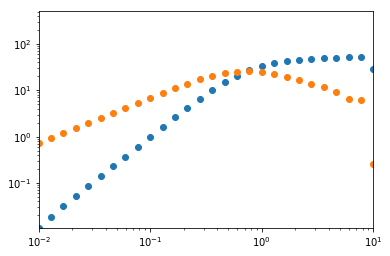

In [11]:
dadoreal = pd.read_csv('Agua2OF.csv', delimiter=';', decimal=',')

DR_x = np.array(dadoreal['f'])
DR_G1 = np.array(dadoreal["G'"])
DR_G2 = np.array(dadoreal["G''"])

plt.scatter(DR_x, DR_G1)
plt.scatter(DR_x, DR_G2)
plt.xscale('log')
plt.yscale('log')
plt.xlim(min(DR_x), max(DR_x))
plt.ylim(min(min(DR_G1), min(DR_G2) / 2), max(max(DR_G1), max(DR_G2)) * 10)

[[Fit Statistics]]
    # function evals   = 21
    # data points      = 56
    # variables        = 2
    chi-square         = 472.405
    reduced chi-square = 8.748
    Akaike info crit   = 123.419
    Bayesian info crit = 127.470
[[Variables]]
    G0:   49.7022102 +/- 0.995138 (2.00%) (init= 10)
    tr:   1.38479891 +/- 0.065253 (4.71%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(G0, tr)                    = -0.425 


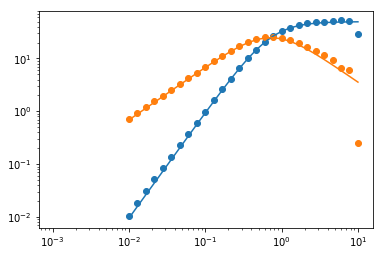

In [12]:
DR_dataset = [DR_G1, DR_G2]

params_real = Parameters()
params_real.add('G0', 10., vary=True)
params_real.add('tr', 1. , vary=True)

def residual_maxwell_real(params, x, datasets):
    model_elast = maxwell_elast(x, params['G0'], params['tr'])
    model_visc  = maxwell_visc (x, params['G0'], params['tr'])
    
    resid1 = datasets[0] - model_elast
    resid2 = datasets[1] - model_visc
    return np.concatenate((resid1, resid2))

fit = minimize( residual, params, args=(DR_x, DR_dataset) )
report_fit(fit)

DR_G0_fit = fit.params['G0']
DR_tr_fit = fit.params['tr']

plt.scatter(DR_x, DR_G1, label="G' dado")
plt.scatter(DR_x, DR_G2, label="G'' dado")
plt.plot(DR_x, maxwell_elast(DR_x, DR_G0_fit, DR_tr_fit), label="G' modelo")
plt.plot(DR_x, maxwell_visc(DR_x, DR_G0_fit, DR_tr_fit), label="G'' modelo")
plt.xscale('log')
plt.yscale('log')

## todo: Utilizar outros dados e fazer ajustes por outros modelos. Definir funções para fazer os ajustes integrados para todos os modelos

In [38]:
def ajuste_Maxwell(w, G1, G2, chutes=[10,1]):
    """chutes: G0, tr"""
    datasets = [G1, G2]
    params = Parameters()
    params.add('G0', chutes[0], vary=True)
    params.add('tr', chutes[1], vary=True)

    def residual_maxwell(params, x, datasets):
        model_elast = maxwell_elast(x, params['G0'], params['tr'])
        model_visc  = maxwell_visc (x, params['G0'], params['tr'])

        resid1 = datasets[0] - model_elast
        resid2 = datasets[1] - model_visc
        return np.concatenate((resid1, resid2))

    fit = minimize( residual_maxwell, params, args=(w, datasets) )
    return fit


def ajuste_Oldroyd(w, G1, G2, chutes=[10,1,2]):
    """chutes: G0, tr, eta_inf"""
    datasets = [G1, G2]
    params = Parameters()
    params.add('G0', chutes[0], vary=True)
    params.add('tr', chutes[1], vary=True)
    params.add('eta_inf', chutes[2], vary=True)
    
    def residual_oldroyd(params, x, datasets):
        old_elast = oldroydB_elast(x, params['G0'], params['tr'])
        old_visc  = oldroydB_visc (x, params['G0'], params['tr'], params['eta_inf'])
        
        resid1 = datasets[0] - old_elast
        resid2 = datasets[1] - old_visc
        return np.concatenate((resid1, resid2))
    
    fit = minimize( residual_oldroyd, params, args=(w, datasets))
    return fit

def ajuste_Jeffreys(w, G1, G2, chutes=[10,1,1]):
    """chutes: G0, lambda1, lambda2"""
    datasets = [G1, G2]
    params = Parameters()
    params.add('G0', chutes[0], vary=True)
    params.add('lambda1', chutes[1], vary=True)
    params.add('lambda2', chutes[2], vary=True)
    
    def residual_jeffreys(params, x, datasets):
        jeff_elast = jeffreys_elast2(x, params['G0'], params['lambda1'], params['lambda2'])
        jeff_visc  = jeffreys_visc2 (x, params['G0'], params['lambda1'], params['lambda2'])
        
        resid1 = datasets[0] - jeff_elast
        resid2 = datasets[1] - jeff_visc
        return np.concatenate((resid1, resid2))
    
    fit = minimize( residual_jeffreys, params, args=(w, datasets))
    return fit


def ajuste_two_mode(w, G1, G2, chutes=[10,10,1,1]):
    """chutes: G0_1, G0_2, lambda1, lambda2"""
    datasets = [G1, G2]
    params = Parameters()
    params.add('G0_1', chutes[0], vary=True)
    params.add('G0_2', chutes[0], vary=True)
    params.add('lambda1', chutes[1], vary=True)
    params.add('lambda2', chutes[2], vary=True)
    
    def residual_two_mode(params, x, datasets):
        tm_elast = two_mode_elast(x, params['G0_1'], params['G0_2'], params['lambda1'], params['lambda2'])
        tm_visc  = two_mode_visc (x, params['G0_1'], params['G0_2'], params['lambda1'], params['lambda2'])
        
        resid1 = datasets[0] - tm_elast
        resid2 = datasets[1] - tm_visc
        return np.concatenate((resid1, resid2))
    
    fit = minimize( residual_two_mode, params, args=(w, datasets))
    return fit

#report_fit(ajuste_Maxwell(DR_x, DR_dataset[0], DR_dataset[1]))
#report_fit()
fit_max = ajuste_Maxwell(DR_x, DR_dataset[0], DR_dataset[1])
fit_oldroyd = ajuste_Oldroyd(DR_x, DR_dataset[0], DR_dataset[1])
fit_jeffreys = ajuste_Jeffreys(DR_x, DR_dataset[0], DR_dataset[1])
fit_two_mode = ajuste_two_mode(DR_x, DR_dataset[0], DR_dataset[1])

In [49]:
from uncertainties import ufloat
# Maxwell
u_G0_max = ufloat(fit_max.params['G0'].value, fit_max.params['G0'].stderr)
u_tr_max = ufloat(fit_max.params['tr'].value, fit_max.params['tr'].stderr)
# Oldroyd
u_G0_old = ufloat(fit_oldroyd.params['G0'].value, fit_oldroyd.params['G0'].stderr)
u_tr_old = ufloat(fit_oldroyd.params['tr'].value, fit_oldroyd.params['tr'].stderr)
u_eta_inf_old = ufloat(fit_oldroyd.params['eta_inf'].value, fit_oldroyd.params['eta_inf'].stderr)
# Jeffreys
u_G0_jeff = ufloat(fit_jeffreys.params['G0'].value, fit_oldroyd.params['G0'].stderr)
u_tr1_jeff = ufloat(fit_jeffreys.params['lambda1'].value, fit_jeffreys.params['lambda1'].stderr)
u_tr2_jeff = ufloat(fit_jeffreys.params['lambda2'].value, fit_jeffreys.params['lambda2'].stderr)
# Two mode
u_G01_TM = ufloat(fit_two_mode.params['G0_1'].value, fit_two_mode.params['G0_1'].stderr)
u_G02_TM = ufloat(fit_two_mode.params['G0_2'].value, fit_two_mode.params['G0_2'].stderr)
u_tr1_TM = ufloat(fit_two_mode.params['lambda1'].value, fit_two_mode.params['lambda1'].stderr)
u_tr2_TM = ufloat(fit_two_mode.params['lambda2'].value, fit_two_mode.params['lambda2'].stderr)

In [51]:
y_max_aj_G1 = maxwell_elast(DR_x, u_G0_max, u_tr_max)
y_max_aj_G2 = maxwell_visc(DR_x, u_G0_max, u_tr_max)

y_old_aj_G1 = oldroydB_elast(DR_x, u_G0_old, u_tr_old)
y_old_aj_G2 = oldroydB_visc(DR_x, u_G0_old, u_tr_old, u_eta_inf_old)

y_jef_aj_G1 = jeffreys_elast2(DR_x, u_G0_jeff, u_tr1_jeff, u_tr2_jeff)
y_jef_aj_G2 = jeffreys_visc2(DR_x, u_G0_jeff, u_tr1_jeff, u_tr2_jeff)

y_TM_aj_G1 = two_mode_elast(DR_x, u_G01_TM, u_G02_TM, u_tr1_TM, u_tr2_TM)
y_TM_aj_G2 = two_mode_visc(DR_x, u_G01_TM, u_G02_TM, u_tr1_TM, u_tr2_TM)

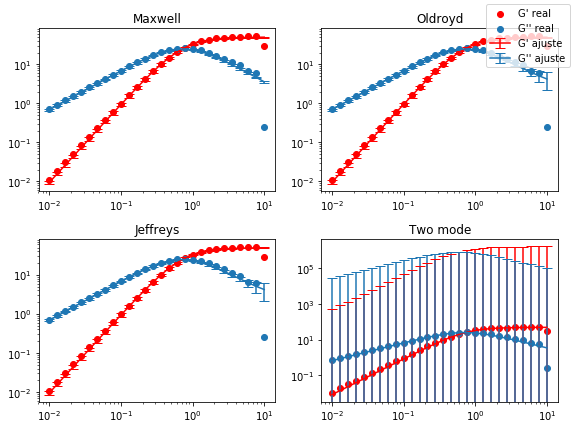

In [57]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(ncols=2, nrows=2, figsize=(8,6))

# Maxwell
ax1.errorbar(DR_x, [a.nominal_value for a in y_max_aj_G1], yerr=[a.std_dev for a in y_max_aj_G1], label="G' ajuste", 
             color='red', ecolor='red', capsize=5)
ax1.errorbar(DR_x, [a.nominal_value for a in y_max_aj_G2], yerr=[a.std_dev for a in y_max_aj_G2], label="G'' ajuste", capsize=5)
ax1.scatter(DR_x, DR_G1, label="G' real", c='red')
ax1.scatter(DR_x, DR_G2, label="G'' real")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title('Maxwell')

# Oldroyd
ax2.errorbar(DR_x, [a.nominal_value for a in y_old_aj_G1], yerr=[a.std_dev for a in y_old_aj_G1], label="G' ajuste", 
             color='red', ecolor='red', capsize=5)
ax2.errorbar(DR_x, [a.nominal_value for a in y_old_aj_G2], yerr=[a.std_dev for a in y_old_aj_G2], label="G'' ajuste", capsize=5)
ax2.scatter(DR_x, DR_G1, label="G' real", c='red')
ax2.scatter(DR_x, DR_G2, label="G'' real")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('Oldroyd')

# Jeffreys
ax3.errorbar(DR_x, [a.nominal_value for a in y_jef_aj_G1], yerr=[a.std_dev for a in y_jef_aj_G1], label="G' ajuste", 
             color='red', ecolor='red', capsize=5)
ax3.errorbar(DR_x, [a.nominal_value for a in y_jef_aj_G2], yerr=[a.std_dev for a in y_jef_aj_G2], label="G'' ajuste", capsize=5)
ax3.scatter(DR_x, DR_G1, label="G' real", c='red')
ax3.scatter(DR_x, DR_G2, label="G'' real")
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_title('Jeffreys')

# Two Mode
ax4.errorbar(DR_x, [a.nominal_value for a in y_TM_aj_G1], yerr=[a.std_dev for a in y_TM_aj_G1], label="G' ajuste", 
             color='red', ecolor='red', capsize=5)
ax4.errorbar(DR_x, [a.nominal_value for a in y_TM_aj_G2], yerr=[a.std_dev for a in y_TM_aj_G2], label="G'' ajuste", capsize=5)
ax4.scatter(DR_x, DR_G1, label="G' real", c='red')
ax4.scatter(DR_x, DR_G2, label="G'' real")
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_title('Two mode')

fig.tight_layout()
fig.legend(["G' real", "G'' real", "G' ajuste", "G'' ajuste"])